In [11]:
!wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo' -O- \
     | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt

--2019-05-09 11:46:11--  https://docs.google.com/uc?export=download&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
Resolving docs.google.com (docs.google.com)... 74.125.142.102, 74.125.142.100, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2019-05-09 11:46:11 (22.3 MB/s) - written to stdout [3255]



In [12]:
!wget --load-cookies cookies.txt -O vgg_face_weights.h5 \
     'https://docs.google.com/uc?export=download&id='1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo'&confirm='$(<confirm.txt)

--2019-05-09 11:46:15--  https://docs.google.com/uc?export=download&id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo&confirm=g_T8
Resolving docs.google.com (docs.google.com)... 74.125.142.101, 74.125.142.139, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ield34d0vfrs398uk5jmch9653ah4n26/1557396000000/02091636547948030128/*/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo?e=download [following]
--2019-05-09 11:46:15--  https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ield34d0vfrs398uk5jmch9653ah4n26/1557396000000/02091636547948030128/*/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo?e=download
Resolving doc-04-80-docs.googleusercontent.com (doc-04-80-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-04-80-docs.googleusercontent.com

In [13]:
!ls

confirm.txt  db     Iresh.jpg	 vgg_face_weights.h5
cookies.txt  drive  sample_data


In [14]:

from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [15]:
model=Sequential()


model.add(ZeroPadding2D(1,input_shape=(224,224, 3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


model.add(ZeroPadding2D(1))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,strides=(2,2)))


model.add(ZeroPadding2D(1))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,strides=(2,2)))

model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,strides=(2,2)))

model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(ZeroPadding2D(1))
model.add(Convolution2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')


In [0]:
def pps_img(path):
  img=load_img(path,target_size=(224,224,3))
  img=img_to_array(img)
  img= np.expand_dims(img,axis=0)
  img=preprocess_input(img)
  return img

In [0]:
def cosSim(orig,pred):
  a=np.matmul(np.transpose(orig),pred)
  b=np.sum(np.multiply(orig,orig))
  c=np.sum(np.multiply(pred,pred))
  return (1 - (a / (np.sqrt(b) * np.sqrt(c))  )  )

In [0]:
def eucDist(orig,pred):
  diff = orig - pred
  sqd_sm = np.sum(np.multiply(diff,diff))
  ed = np.sqrt(sqd_sm)
  return ed

In [0]:
face_model = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output)

In [0]:
!wget -O musk3.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFpcso28wtARxIEs9JNds5mNSSeSt5Jj6HZlaKJPQ-bT9ITA-V

--2019-05-09 07:24:34--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFpcso28wtARxIEs9JNds5mNSSeSt5Jj6HZlaKJPQ-bT9ITA-V
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.133.138, 74.125.133.139, 74.125.133.101, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.133.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5122 (5.0K) [image/jpeg]
Saving to: ‘musk3.jpg’

musk3.jpg           100%[===================>]   5.00K  --.-KB/s    in 0s      

2019-05-09 07:24:34 (50.4 MB/s) - ‘musk3.jpg’ saved [5122/5122]



In [0]:
!wget -O gates.jpg https://blogs-images.forbes.com/danalexander/files/2014/11/Bill-Gates-e1415041993986-1940x1091.jpg

--2019-05-09 07:29:28--  https://blogs-images.forbes.com/danalexander/files/2014/11/Bill-Gates-e1415041993986-1940x1091.jpg
Resolving blogs-images.forbes.com (blogs-images.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to blogs-images.forbes.com (blogs-images.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174450 (170K) [image/jpeg]
Saving to: ‘gates.jpg’

gates.jpg           100%[===================>] 170.36K  --.-KB/s    in 0.02s   

2019-05-09 07:29:29 (10.5 MB/s) - ‘gates.jpg’ saved [174450/174450]



In [0]:
epsC = 0.40
epsE = 120
def idfyFace(img1):
    
    import os
    employee_pictures = "db/"

    employees = dict()

    for file in os.listdir(employee_pictures):
      #
      employees[file] = face_model.predict(pps_img('db/%s' % (file)))[0,:]

    print("employee representations retrieved successfully")

    
    
    
    img1_representation = face_model.predict(pps_img(img1))[0,:]
      
    found = 0
    for i in employees:
      name,extension = i.split(".")
      representation = employees[i]
      cosim = cosSim(img1_representation, representation)
      ed = eucDist(img1_representation, representation)
      
      if(cosim< 0.30):
        print("Cosine similarity: ",cosim)
        print("Euclidean distance: ",ed)
        found=1
        print("Person Identified, Welcome ",name)
        f = plt.figure()
        f.add_subplot(1,2, 1)
        plt.imshow(image.load_img(img1))
        plt.xticks([]); plt.yticks([])
        f.add_subplot(1,2, 2)
        plt.imshow(image.load_img("db/"+i))
        plt.xticks([]); plt.yticks([])
        plt.show(block=True)
        break

       
    if found == 0:
      plt.imshow(image.load_img(img1))
      print("Access Denied, Not Identified!")


In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=800 height=600></video>
<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8):
  display(HTML(VIDEO_HTML % quality))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [9]:
take_photo()

66582

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Cosine similarity:  0.23708051443099976
Euclidean distance:  68.48761
Person Identified, Welcome  Iresh


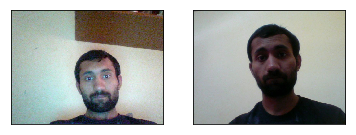

In [24]:
idfyFace('photo.jpg')

employee representations retrieved successfully
Cosine similarity:  0.07716995477676392
Euclidean distance:  39.759445
Person Identified, Welcome  Iresh


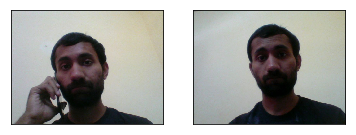

In [0]:
idfyFace('photo.jpg')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Access Denied, Not Identified!


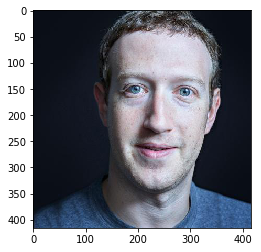

In [0]:
idfyFace('Mark.jpg')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Cosine similarity:  0.27483320236206055
Euclidean distance:  78.284706
Person Identified, Welcome  Elon


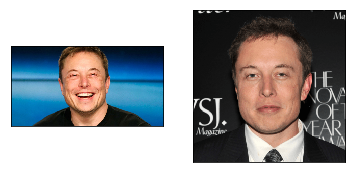

In [0]:
idfyFace('musk.jpg')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Cosine similarity:  0.18416500091552734
Euclidean distance:  68.92557
Person Identified, Welcome  Elon


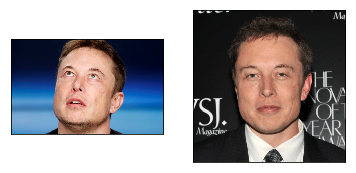

In [0]:
idfyFace('musk2.jpg')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Cosine similarity:  0.268149733543396
Euclidean distance:  77.45448
Person Identified, Welcome  Elon


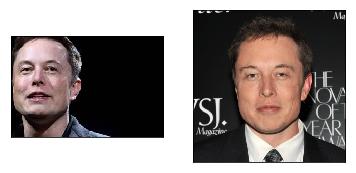

In [0]:
idfyFace('musk3.jpg')

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


employee representations retrieved successfully
Access Denied, Not Identified!


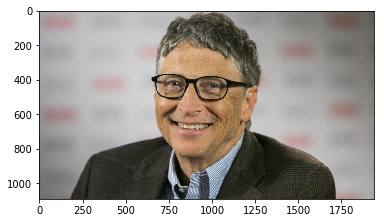

In [0]:
idfyFace('gates.jpg')